In [1]:
import cv2
from numpy import pi, exp, sqrt
import numpy as np
import matplotlib.pyplot as plt
from convolution import *
from pyramid import ComputePyr

%matplotlib inline

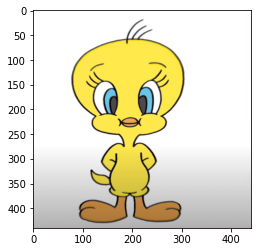

In [2]:
image = cv2.imread('Original_Images//tweety.png')
image = np.float32(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(np.uint8(image))
plt.show()

In [3]:
image.shape

(440, 440, 3)

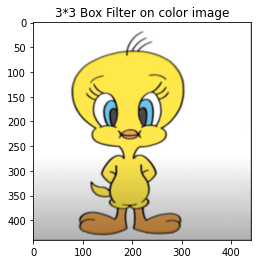

In [4]:
w = 1/9*np.ones((3,3))
g = conv2(image,w,0)
plt.imshow(g.astype('uint8'))
plt.title('3*3 Box Filter on color image')
plt.show()

In [5]:
s, k = 1, 2 #  generate a (2k+1)x(2k+1) gaussian kernel with mean=0 and standard deviation = s
pdf = [exp(-x*x/(2*s*s))/sqrt(2*pi*s*s) for x in range(-k,k+1)] 
kernel = np.outer(pdf, pdf)
kernel = kernel/np.sum(kernel)
print (kernel)

[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]


In [6]:
np.sum(kernel)

1.0

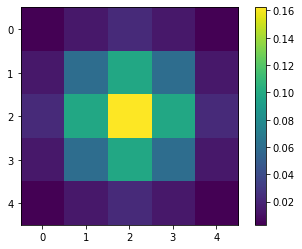

In [7]:
import matplotlib.pylab as plt
plt.imshow(kernel)
plt.colorbar()
plt.show()

In [8]:
#list of images gained in gaussian pyramid 
gPyr, lPyr = ComputePyr(image,3)

In [9]:
for i in range(len(gPyr)):
    
    print(gPyr[i].shape)

(440, 440, 3)
(220, 220, 3)
(110, 110, 3)
(55, 55, 3)


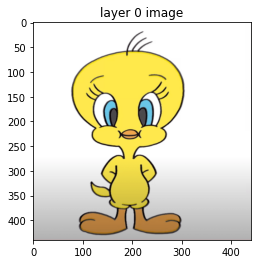

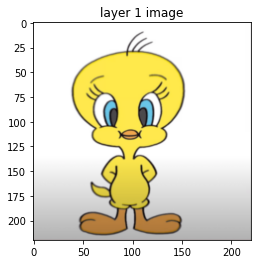

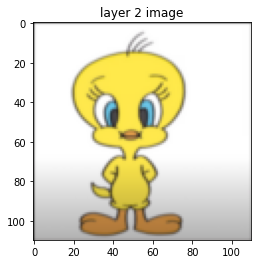

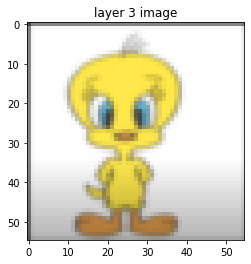

In [10]:
for i in range(len(gPyr)):
    
    plt.imshow(gPyr[i].astype('uint8'))
    plt.title('layer {} image'.format(i))
    plt.show()

In [11]:
image_list_laplacian = []

for i in range(len(gPyr)):
    
    image_list_laplacian.append(gPyr[i].copy()) 

# Laplacian Pyramid

# Visualization of Laplacian pyramid

In [12]:
image_list_laplacian_copy = []

for i in range(len(lPyr)):
    
    image_list_laplacian_copy.append(lPyr[i].copy()) 

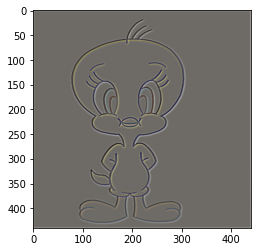

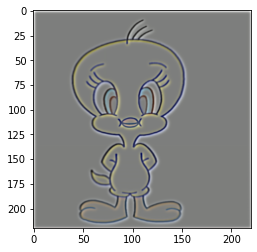

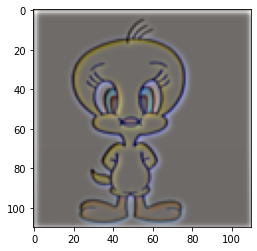

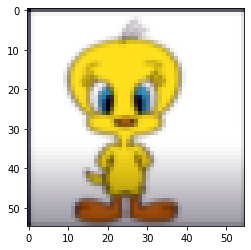

In [13]:
for i in range(len(image_list_laplacian_copy)):
    
    r,g,b = cv2.split(image_list_laplacian_copy[i])
    minr = np.min(r)
    maxr = np.max(r)
    r = (r - minr)/(maxr-minr)
    ming = np.min(g)
    maxg = np.max(g)
    g = (g - ming)/(maxg-ming)
    minb = np.min(b)
    maxb = np.max(b)
    b = (b - minb)/(maxb-minb)
    
    image_list_laplacian_copy[i] = cv2.merge((r,g,b))
    
    plt.imshow(image_list_laplacian_copy[i])
    plt.show()

# Reconstruction using Laplacian and Gaussian Pyramids

In [30]:
def reconstruct(last_gaussian_layer, _laplacian_copy):
    
    laplacian_copy = [img.copy() for img in _laplacian_copy]
    
    image = last_gaussian_layer.copy()
    print(image.shape)
    for i in range(len(laplacian_copy)-2, -1, -1):
        print(i)
        details = laplacian_copy[i].copy()
        
        height, width = image.shape[0], image.shape[1]
        resized_height, resized_width = height*2, width*2
        print(height, width)
        print(resized_height, resized_width)
        resized_image = cv2.resize(image, (resized_width,resized_height), interpolation=cv2.INTER_NEAREST)
        blurred_image = conv2(resized_image, kernel, 0)
        reconstructed_image = blurred_image + details
        
        image = reconstructed_image.copy()
        
    return image

# Blending

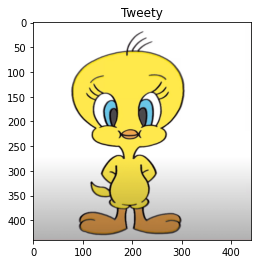

In [31]:
tweety_image = cv2.imread('Original_Images//tweety.png')
tweety_image = np.float32(tweety_image)
tweety_image = cv2.cvtColor(tweety_image, cv2.COLOR_BGR2RGB)
plt.imshow(np.uint8(tweety_image))
plt.title('Tweety')
plt.show()

# Gaussian and Laplacian for Background Image

In [32]:
tweety_gPyr, tweety_lPyr = ComputePyr(tweety_image,3)

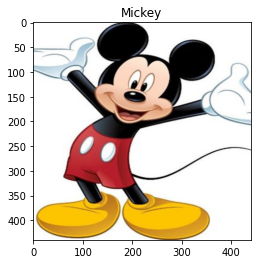

In [33]:
mickey_image = cv2.imread('Original_Images//mickey.png')
mickey_image = np.float32(mickey_image)
mickey_image = cv2.cvtColor(mickey_image, cv2.COLOR_BGR2RGB)
plt.imshow(np.uint8(mickey_image))
plt.title('Mickey')
plt.show()

# Gaussian and Laplacian Pyramid for Foreground Image

In [34]:
mickey_gPyr, mickey_lPyr = ComputePyr(mickey_image,3)

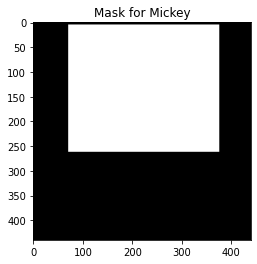

In [35]:
mask_mickey = cv2.imread('gui_images//mask_for_mickey.png')
mask_mickey = np.float32(mask_mickey)
#mask_mickey = cv2.cvtColor(mask_scream, cv2.COLOR_BGR2RGB)
plt.imshow(np.uint8(mask_mickey))
plt.title('Mask for Mickey')
#plt.axis('off')
plt.show()

In [36]:
mask_mickey.shape

(440, 440, 3)

# Gaussian and Laplacian Pyramid for Mask of Foreground Image

In [37]:
mickey_mask_gPyr, mickey_mask_lPyr = ComputePyr(mask_mickey/255.,3)

In [38]:
mickey_mask_gPyr[-1].max()

1.0

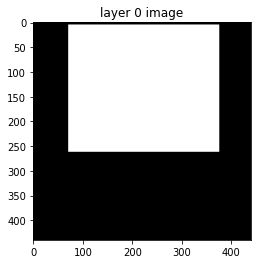

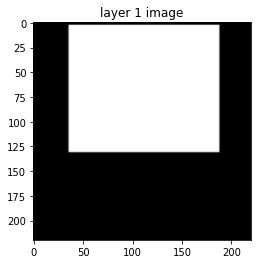

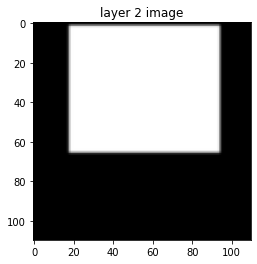

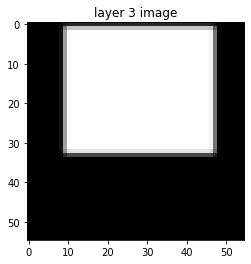

In [39]:
for i in range(len(mickey_mask_gPyr)):
    
    plt.imshow((mickey_mask_gPyr[i]*255.).astype('uint8'))
    plt.title('layer {} image'.format(i))
    plt.show()

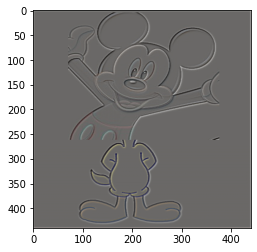

0


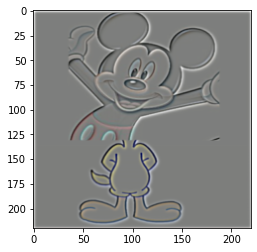

1


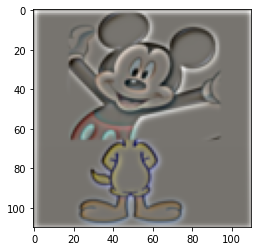

2


In [25]:
blended_image = []

for i in range(len(mickey_lPyr)):
    
    blended_image.append(mickey_lPyr[i].copy()) 
    
for i in range(len(mickey_lPyr)-1):
    
    blended_image[i] = mickey_mask_gPyr[i]*mickey_lPyr[i] + (1. - mickey_mask_gPyr[i])*tweety_lPyr[i]
    
    r,g,b = cv2.split(blended_image[i])
    minr = np.min(r)
    maxr = np.max(r)
    r = (r - minr)/(maxr-minr)
    ming = np.min(g)
    maxg = np.max(g)
    g = (g - ming)/(maxg-ming)
    minb = np.min(b)
    maxb = np.max(b)
    b = (b - minb)/(maxb-minb)
    
    imgg = cv2.merge((r,g,b))
    
    plt.imshow(imgg)
    plt.show()
    
    print(i)

In [40]:
expected_blended_image = mickey_gPyr[-1]*mickey_mask_gPyr[-1] + tweety_gPyr[-1]*(1. - mickey_mask_gPyr[-1])

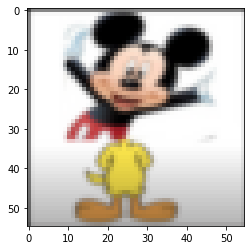

In [41]:
plt.imshow(expected_blended_image.astype(np.uint8))
plt.show()

In [42]:
expected_blended_image = np.float32(expected_blended_image)

In [43]:
final_blended_image = reconstruct(expected_blended_image, blended_image)

(55, 55, 3)
2
55 55
110 110
1
110 110
220 220
0
220 220
440 440


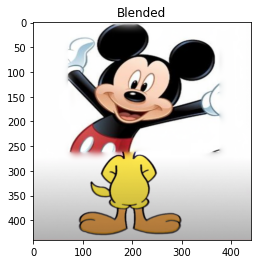

In [46]:
clipped = np.clip(final_blended_image, 0, 255.)
clipped = clipped.astype('uint8')
#clipped = cv2.cvtColor(clipped, cv2.COLOR_BGR2RGB)
plt.imshow(np.uint8(clipped))
#plt.imshow(np.uint8(final_blended_image))
plt.title('Blended')
plt.show()

In [47]:
np.max(clipped)

255

In [49]:
clipped = cv2.cvtColor(clipped, cv2.COLOR_BGR2RGB)
cv2.imwrite('Mickey+Tweety.png', clipped)

True